# Custom Display Logic Exercises

In [1]:
from IPython.display import display
from IPython.display import (
    display_png, display_html, display_latex,
    display_javascript, display_svg
)

## Circle class with custom display methods

Write a simple `MyCircle` Python class. Here is a skeleton to get you started:

```python
class MyCircle(object):
    def __init__(self, center=(0.0,0.0), radius=1.0, color='blue'):
        self.center = center
        self.radius = radius
        self.color = color
```

Now add special display methods to this class for the following representations (remember to wrap them in Python strings):

For HTML:

    &#x25CB;

For SVG:

    <svg width="100px" height="100px">
        <circle cx="50" cy="50" r="20" stroke="black" stroke-width="1" fill="white"/>
    </svg>

For LaTeX (wrap with `$` and use a raw Python string):

    \bigcirc

For JavaScript:

    alert('I am a circle!');

After you write the class, create an instance and then use `display_html`, `display_svg`, `display_latex` and `display_javascript` to display those representations.

### Solution

Here is the solution to the simple `MyCircle` class:

In [2]:
# %load -s MyCircle soln/mycircle.py
class MyCircle(object):

    def __init__(self, center=(0.0,0.0), radius=1.0, color='blue'):
        self.center = center
        self.radius = radius
        self.color = color

    def _repr_html_(self):
        return "&#x25CB; (<b>html</b>)"

    def _repr_svg_(self):
        return """<svg width="100px" height="100px">
           <circle cx="50" cy="50" r="20" stroke="black" stroke-width="1" fill="blue"/>
        </svg>"""
    
    def _repr_latex_(self):
        return r"$\bigcirc \LaTeX$"

    def _repr_javascript_(self):
        return "alert('I am a circle!');"


Now create an instance and use the display methods:

In [3]:
c = MyCircle()

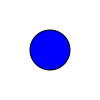

In [12]:
#display(c)

In [11]:
display_html(c)

○ ( html )

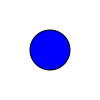

In [10]:
display_svg(c)

In [7]:
display_latex(c)

In [9]:
#display_javascript(c)

## PNG formatter for `MyCircle`

In [13]:
%matplotlib inline
from matplotlib import pyplot as plt

Now let's assume that the `MyCircle` class has already been defined and add a PNG representation using a formatter display function. Here is a function that converts a `MyCircle` instance to raw PNG data.

In [14]:
from IPython.core.pylabtools import print_figure

def circle_to_png(circle):
    """Render AnotherCircle to png data using matplotlib"""
    fig, ax = plt.subplots()
    patch = plt.Circle(circle.center,
                       radius=circle.radius,
                       fc=circle.color,
                       )
    ax.add_patch(patch)
    plt.axis('scaled')
    data = print_figure(fig, 'png')
    # We MUST close the figure, otherwise IPython's display machinery
    # will pick it up and send it as output, resulting in a double display
    plt.close(fig)
    return data

Now use the IPython API to get the PNG formatter (`image/png`) and call the `for_type` method to register `circle_to_png` as the display function for `MyCircle`.

In [15]:
# %load soln/mycircle_png.py
ip = get_ipython()
png_f = ip.display_formatter.formatters['image/png']
png_f.for_type(MyCircle, circle_to_png)

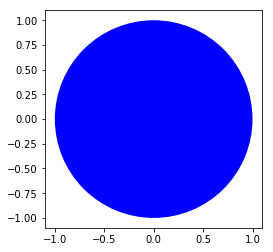

In [16]:
display_png(c)

## PNG formatter for NumPy arrays

In this exercise, you will register a display formatter function that generates a PNG representation of a 2d NumPy array. Here is the function that uses the [Python Imaging Library (PIL)](http://www.pythonware.com/products/pil/) to generate the raw PNG data:

In [17]:
from PIL import Image
from io import BytesIO
import numpy as np

def ndarray_to_png(x):
    if len(x.shape) != 2: return
    x = np.asarray(Image.fromarray(x).resize((500, 500)))
    x = (x - x.min()) / (x.max() - x.min())
    img = Image.fromarray((x*256).astype('uint8'))
    img_buffer = BytesIO()
    img.save(img_buffer, format='png')
    return img_buffer.getvalue()

Use the `for_type` method of the PNG formatter to register `ndarray_to_png` as the display function for `np.ndarray`.

In [19]:
# %load soln/ndarray_png.py
ip = get_ipython()
png_f = ip.display_formatter.formatters['image/png']
png_f.for_type(np.ndarray, ndarray_to_png)

<function __main__.ndarray_to_png(x)>

Now create a few NumPy arrays and display them. Notice that their default representation in the Notebook is PNG rather than text.

In [20]:
a = np.random.rand(100,100)

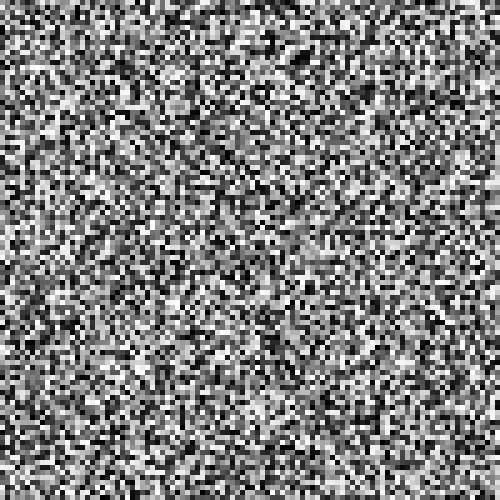

In [21]:
a

You can still display the plain text representation using the `display_pretty` function.

In [22]:
from IPython.display import display_pretty

In [23]:
display_pretty(a)

array([[0.60946004, 0.523665  , 0.15154209, ..., 0.27974076, 0.62768842,
        0.1978523 ],
       [0.92636568, 0.42907924, 0.73286877, ..., 0.81174205, 0.64539057,
        0.42644534],
       [0.50944436, 0.6389472 , 0.29562595, ..., 0.34350084, 0.24842953,
        0.09596811],
       ...,
       [0.9488093 , 0.12005745, 0.23280671, ..., 0.53169801, 0.72629091,
        0.74947505],
       [0.80646608, 0.33128413, 0.74135132, ..., 0.45897836, 0.42218108,
        0.8808621 ],
       [0.71208637, 0.11274526, 0.69126439, ..., 0.36636754, 0.0765809 ,
        0.82045294]])

In [24]:
b = np.linspace(0,100.0, 100**2).reshape((100,100))

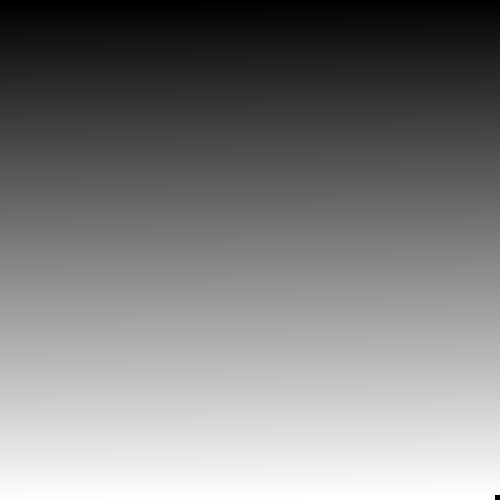

In [25]:
b